Data from https://www.kaggle.com/arshahuja/anomaly-detection

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv(os.getcwd()+"\\creditcard.csv")

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
len(df)

284807

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        2.600e+01, 1.950e+02, 2.302e+03, 7.471e+03]),
 array([-27.67056888, -24.70746234, -21.74435579, -18.78124925,
        -15.8181427 , -12.85503616,  -9.89192961,  -6.92882307,
         -3.96571652,  -1.00260998,   1.96049657]),
 <a list of 10 Patch objects>)

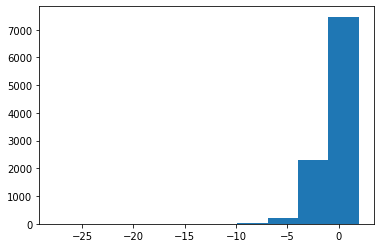

In [9]:
plt.hist(df['V1'][0:10000])

In [14]:
x = df.drop('Class', axis=1)

In [16]:
y = df['Class']

In [43]:
y.value_counts() # skewed binary classification

0    284315
1       492
Name: Class, dtype: int64

In [44]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [52]:
# determine min values for each column
# to add back to enable log/sqrt calculations for preprocessing
min_vals = {}

for col in x.columns:
    if col[:1] == 'V':
        min_vals[col] = min(x[col])

In [58]:
def data_preprocess(x):
    x_new = x
    
    for col in x.columns:

        if col[:1] == 'V':
            
            x_new['log_' + col] = np.log(x[col] + abs(min_vals[col]) + 1)
            x_new['sqrt_' + col] = np.sqrt(x[col] + abs(min_vals[col]) + 1)
            
    return x_new
            
x_prep = data_preprocess(x)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_prep, y, test_size=0.3, random_state=101)

In [60]:
scaler_X = MinMaxScaler()

In [61]:
X_train_trans = scaler_X.fit_transform(X_train)
X_test_trans = scaler_X.transform(X_test)

In [62]:
X_test_trans[0]

array([0.52286038, 0.95551889, 0.78321323, 0.8103989 , 0.37985576,
       0.56386668, 0.51961595, 0.51342798, 0.78078821, 0.44175054,
       0.52014834, 0.26826274, 0.57463534, 0.70621724, 0.69294108,
       0.30165007, 0.66911612, 0.70885349, 0.66806722, 0.40241452,
       0.41343414, 0.56248937, 0.53179671, 0.59141783, 0.3858907 ,
       0.55928198, 0.45488393, 0.6434274 , 0.25208306, 0.00150739,
       0.98907066, 0.94707033, 0.88676412, 0.71436437, 0.64834588,
       0.83812124, 0.85370901, 0.94621786, 0.76589827, 0.83709182,
       0.59071366, 0.84089521, 0.87166759, 0.88789164, 0.58245124,
       0.87921584, 0.88606393, 0.86444077, 0.69204164, 0.56502432,
       0.86410116, 0.80936516, 0.75753288, 0.62758647, 0.75864712,
       0.66777568, 0.88098694, 0.52140492, 0.97460411, 0.87332754,
       0.85088304, 0.54298399, 0.60652193, 0.68298062, 0.68712286,
       0.87172262, 0.60371975, 0.68275833, 0.41755217, 0.71358454,
       0.79470772, 0.79768764, 0.43463484, 0.78141908, 0.80415

In [63]:
X_test_trans.shape

(85443, 86)

In [116]:
tf.keras.backend.clear_session()

num_epochs = 10

model = Sequential([
    Dense(units=100, activation='relu', input_shape=(X_train_trans.shape[1],)),
    Dropout(0.2),
    Dense(units=200, activation='relu'),
    Dropout(0.2),
    Dense(units=400, activation='relu'),
    Dropout(0.2),
    Dense(units=100, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

history = model.fit(X_train_trans, y_train, epochs=num_epochs, validation_data=(X_test_trans, y_test), verbose=1)

Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0104 - acc: 0.9984 - val_loss: 0.0041 - val_acc: 0.9992
Epoch 2/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0047 - acc: 0.9992 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 3/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0045 - acc: 0.9992 - val_loss: 0.0030 - val_acc: 0.9995
Epoch 4/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0034 - val_acc: 0.9993
Epoch 5/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0038 - val_acc: 0.9994
Epoch 6/10
199364/199364 [==============================] - 25s 128us/sample - loss: 0.0042 - acc: 0.9992 - val_loss: 0.0031 - val_acc: 0.9995
Epoch 7/10
199364/199364 [==============================] - 25s 127us/sample - loss: 0.0043

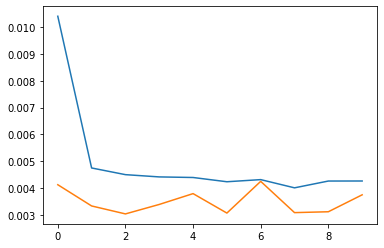

In [117]:
plt.plot(range(num_epochs), history.history['loss'])
plt.plot(range(num_epochs), history.history['val_loss'])

In [118]:
preds_soft = model.predict(X_test_trans)

In [119]:
cutoff = 0.7
preds = [1 if x > cutoff else 0 for x in preds_soft]

print(classification_report(y_test, preds))
print()
print(confusion_matrix(y_test, preds))

# TP FN
# FP TN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.80      0.82      0.81       144

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443


[[85270    29]
 [   26   118]]
